In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("rating_count",sep=",",skiprows=1,usecols=[0,1],names=["rating","count"])
data

,rating,count
0,G,178
1,PG,194
2,R,195
3,NC-17,210
4,PG-13,223


Text(0, 0.5, 'Count')

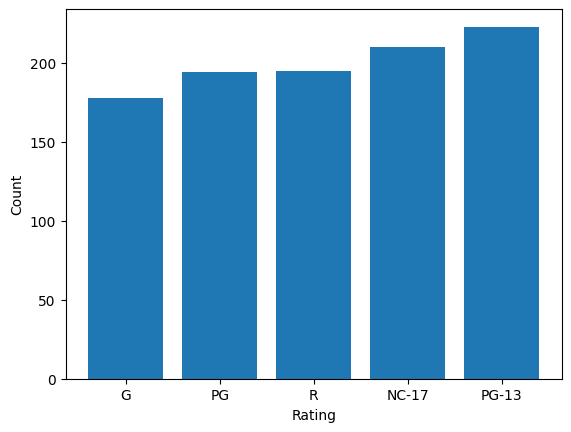

In [ ]:
chart=plt.bar(data["rating"],data["count"])
plt.xlabel("Rating")
plt.ylabel("Count")

In [ ]:
data=pd.read_csv("category",sep=",",skiprows=1,usecols=[0,1],names=["category","count"])
data

,category,count
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Sci-Fi,61
9,Games,61


Text(0, 0.5, 'Count')

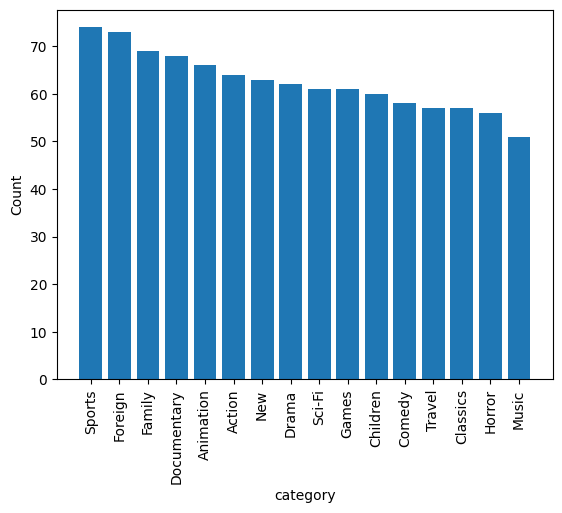

In [ ]:
chart=plt.bar(data["category"],data["count"])
plt.xlabel("category")
plt.xticks(rotation=90)
plt.ylabel("Count")

In [ ]:
data=pd.read_csv("category_rating combined",sep=",",skiprows=1,names=["category","rating","count"])
data

,category,rating,count
0,Action,G,18
1,Action,PG,9
2,Action,PG-13,11
3,Action,R,14
4,Action,NC-17,12
...,...,...,...
75,Travel,G,11
76,Travel,PG,14
77,Travel,PG-13,12
78,Travel,R,10


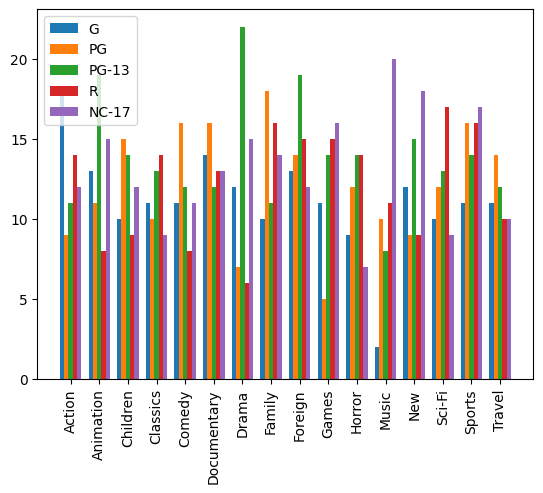

In [ ]:
fig, ax = plt.subplots()
x=data["rating"].unique()
xsize=np.arange(len(data["category"].unique()))
w=0.15
for i in range(len(x)):
  ax.bar(xsize-2*w+w*i,data['count'][i::len(x)],w,label=x[i])
ax.set_xticks(xsize)
ax.set_xticklabels(data["category"].unique(), rotation='vertical')
ax.legend()









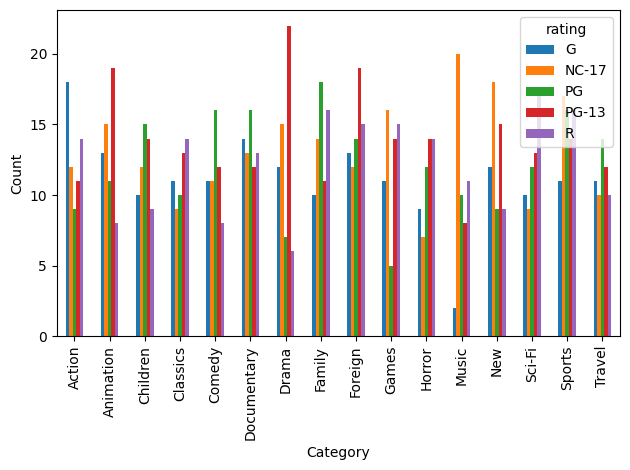

In [ ]:
pivot = data.pivot(index="category", columns="rating", values="count")

fig, ax = plt.subplots()
pivot.plot(kind="bar", ax=ax)

ax.set_xlabel("Category")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
data=pd.read_csv("transaction_number",sep=",",skiprows=1,names=["range","count"])
data

,range,count
0,10-15,4
1,15-20,37
2,20-25,159
3,25-30,221
4,30-35,141
5,35-40,30
6,40-X,7


Text(0.5, 1.0, 'Zakres transakcji klientów')

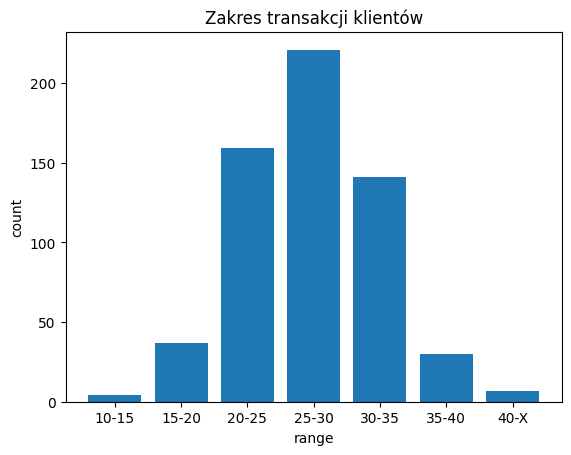

In [ ]:
plt.bar(data['range'],data['count'])
plt.xlabel("range")
plt.ylabel("count")
plt.title("Zakres transakcji klientów")

In [ ]:
data=pd.read_csv("sum_range",sep=",",skiprows=1,names=["range","count"])
data

,range,count
0,0-75,38
1,075-100,166
2,100-125,221
3,125-150,128
4,150-175,37
5,175-X,9


Text(0.5, 1.0, 'Zakres wydanej gotówki klientów')

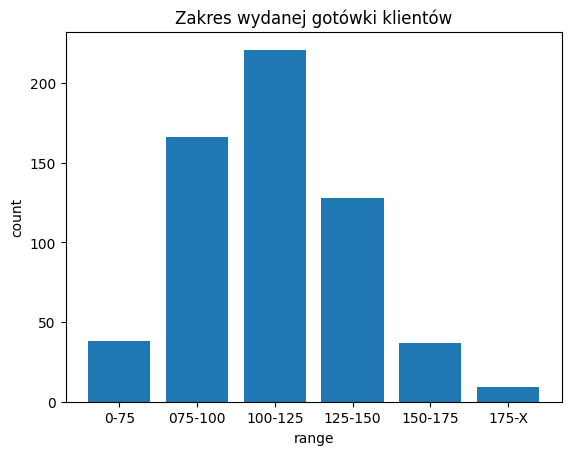

In [ ]:
plt.bar(data['range'],data['count'])
plt.xlabel("range")
plt.ylabel("count")
plt.title("Zakres wydanej gotówki klientów")

In [17]:
data=pd.read_csv("average_cost_by_unit",sep=",",skiprows=1,names=["avg","category"])
data

,avg,category
0,3.05,PG
1,3.03,PG-13
2,2.97,NC-17
3,2.94,R
4,2.89,G


Text(0.5, 1.0, 'Średni koszt pojedynczej kopii')

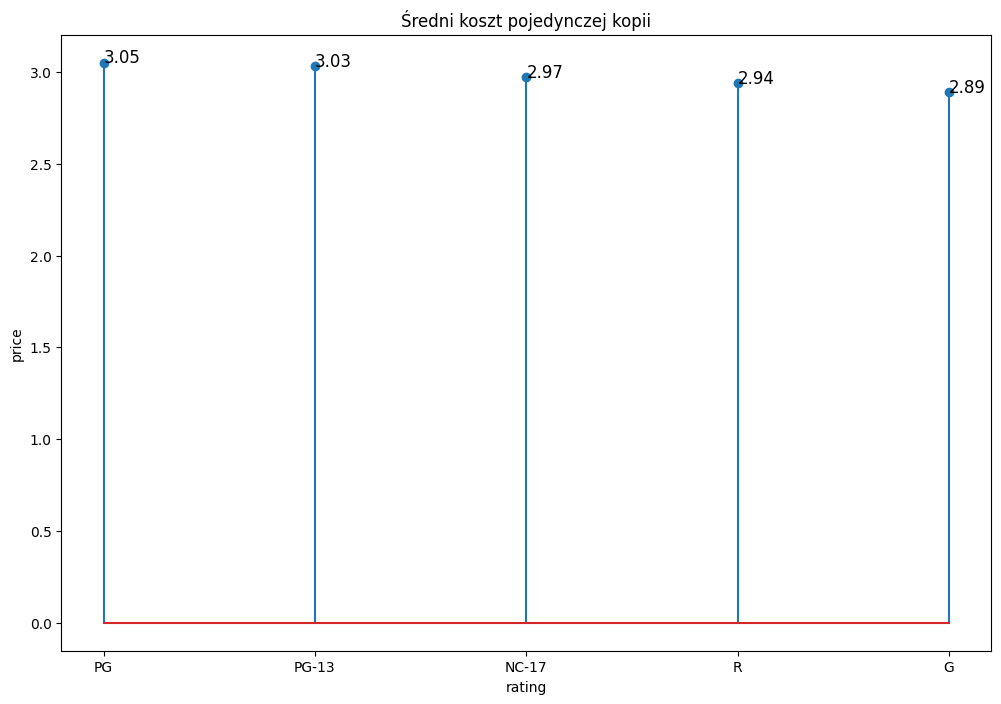

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.stem(data['category'], data['avg'])
for index in range(len(data['avg'])):
  ax.text(data['category'][index], data['avg'][index], data['avg'][index], size=12)
ax.set_xlabel("rating")
ax.set_ylabel("price")
ax.set_title("Średni koszt pojedynczej kopii")


In [25]:
data=pd.read_csv("total_sale_by_rating",sep=",",skiprows=1,names=["sum","category"])
data

,sum,category
0,15259.16,PG-13
1,13885.02,NC-17
2,13337.91,PG
3,13270.19,R
4,11664.23,G


Text(0.5, 1.0, 'Sprzedaż według kategorii')

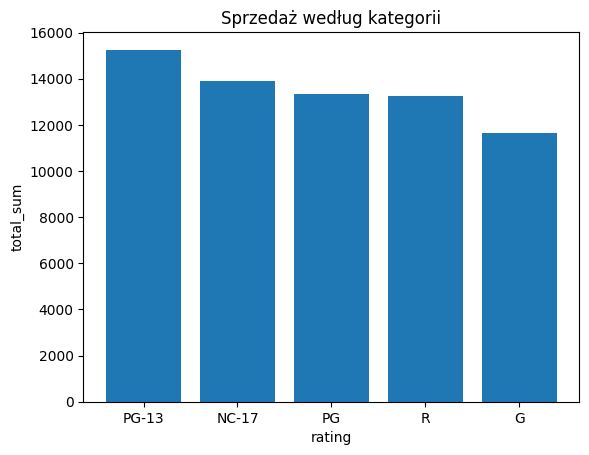

In [23]:
plt.bar(data['category'],data['sum'])
plt.xlabel("rating")
plt.ylabel("total_sum")
plt.title("Sprzedaż według kategorii")

In [30]:
data2=pd.read_csv("number_of_rental",sep=",",skiprows=1,names=["sum","category"])
data3=pd.merge(data,data2,on="category",)
data3['avg']=round(data3['sum_x']/data3['sum_y'],2)
data3=data3.drop(columns=['sum_x','sum_y'])
data3=data3.sort_values(by='avg',ascending=False)
data3

,category,avg
0,PG-13,4.26
1,NC-17,4.21
4,G,4.21
3,R,4.17
2,PG,4.15


Text(0.5, 1.0, 'Średni realny koszt pojedynczej kopii')

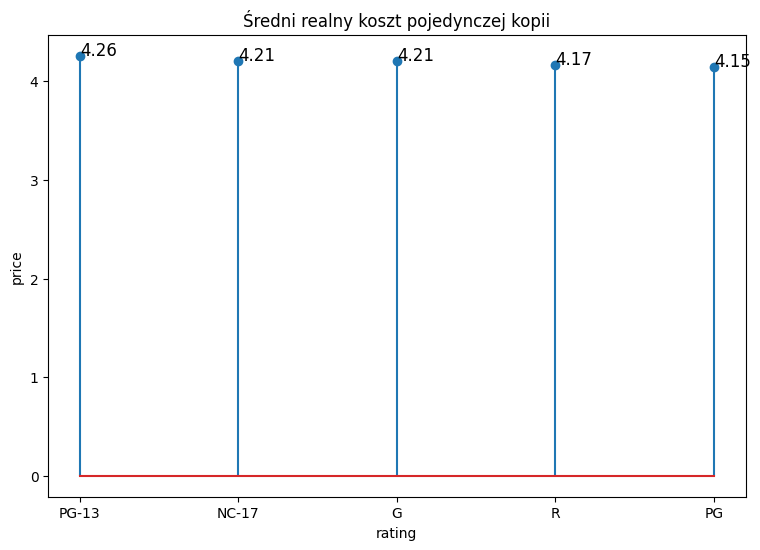

In [31]:
fig, ax = plt.subplots(figsize=(9,6))
ax.stem(data3['category'], data3['avg'])
for index in range(len(data3['avg'])):
  ax.text(data3['category'][index], data3['avg'][index], data3['avg'][index], size=12)
ax.set_xlabel("rating")
ax.set_ylabel("price")
ax.set_title("Średni realny koszt pojedynczej kopii")